In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [2]:
# Read the dataset
orders = pd.read_csv('../PizzaPlaceSales/pizza_sales/order_summary.csv')
pizza_types = pd.read_csv('../PizzaPlaceSales/pizza_sales/pizza_types.csv')

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48592 entries, 0 to 48591
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48592 non-null  int64  
 1   order_details_id  48592 non-null  int64  
 2   o_date            48592 non-null  object 
 3   o_time            48592 non-null  object 
 4   pizza_id          48592 non-null  object 
 5   quantity          48592 non-null  int64  
 6   pizza_type_id     48592 non-null  object 
 7   size              48592 non-null  object 
 8   unit_price        48592 non-null  float64
 9   name              48592 non-null  object 
 10  category          48592 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 4.1+ MB


In [4]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [5]:
orders["date"] = pd.to_datetime(orders["o_date"])

In [6]:
ordercounts = orders[['order_id','date']].groupby('date').count()

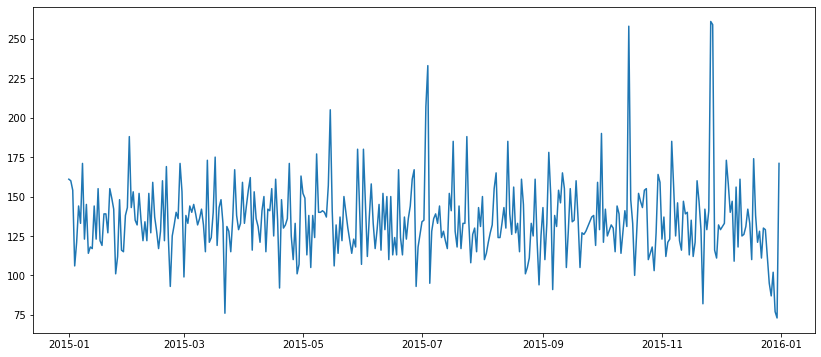

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(ordercounts);

In [8]:
ordercounts.mean()

order_id    135.731844
dtype: float64

In [9]:
newcounts = ordercounts.reset_index()

In [10]:
newcounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      358 non-null    datetime64[ns]
 1   order_id  358 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.7 KB


In [11]:
365-358

7

In [12]:
idx = pd.date_range(ordercounts.index.min(), ordercounts.index.max())
print('missing_dates are',idx.difference(ordercounts.index))

missing_dates are DatetimeIndex(['2015-09-24', '2015-09-25', '2015-10-05', '2015-10-12',
               '2015-10-19', '2015-10-26', '2015-12-25'],
              dtype='datetime64[ns]', freq=None)


All mondays in October
Thursday and Friday in September
Christmas in December - Friday
https://stackoverflow.com/questions/47231496/pandas-fill-missing-dates-in-time-series

In [13]:
orders['hour'] = pd.to_datetime(orders['o_time'], format='%H:%M:%S').dt.hour

In [14]:
orders['hour']

0        12
1        18
2        12
3        12
4        11
         ..
48587    13
48588    18
48589    19
48590    19
48591    21
Name: hour, Length: 48592, dtype: int64

In [15]:
ordersbytime = orders[['order_id', 'date', 'hour']].groupby(['date','hour']).size().reset_index(name='order_counts')

In [16]:
ordersbytime.head()

,date,hour,order_counts
0,2015-01-01,11,6
1,2015-01-01,12,17
2,2015-01-01,13,32
3,2015-01-01,14,15
4,2015-01-01,15,14


In [17]:
ordersbytime[ordersbytime.hour == 10]

,date,hour,order_counts
642,2015-02-25,10,2
1023,2015-03-30,10,3
1083,2015-04-04,10,3
1469,2015-05-07,10,1
1945,2015-06-17,10,2
2124,2015-07-02,10,3
2945,2015-09-10,10,1
3201,2015-10-04,10,2


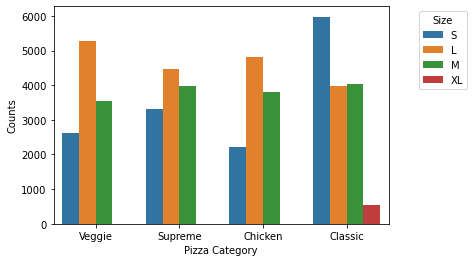

In [18]:
sns.countplot(x='category', hue='size', data=orders)
plt.xlabel('Pizza Category')
plt.ylabel('Counts')
plt.legend(bbox_to_anchor=(1.25,1), title='Size');

https://stackoverflow.com/questions/66165309/how-to-replicate-rows-based-on-value-of-a-column-in-same-pandas-dataframe

In [19]:
out = pd.DataFrame(orders.values.repeat(orders['quantity'], axis=0), columns=orders.columns)

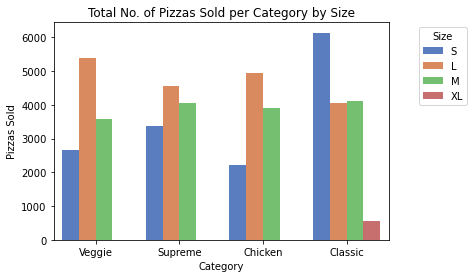

In [20]:
sns.countplot(x='category', hue='size', data=out, palette='muted')
plt.xlabel('Category')
plt.ylabel('Pizzas Sold')
plt.title('Total No. of Pizzas Sold per Category by Size')
plt.legend(bbox_to_anchor=(1.25,1), title='Size');

In [21]:
#sns.countplot(x='size', data=out, palette='muted');

In [22]:
#sns.countplot(x='category', data=out, palette='Set2');

In [23]:
ordersbytime['day_of_month'] = ordersbytime['date'].dt.day
ordersbytime['month'] = ordersbytime['date'].dt.month
ordersbytime['day_of_week'] = ordersbytime['date'].dt.day_name()

In [24]:
ordersbytime.head()

,date,hour,order_counts,day_of_month,month,day_of_week
0,2015-01-01,11,6,1,1,Thursday
1,2015-01-01,12,17,1,1,Thursday
2,2015-01-01,13,32,1,1,Thursday
3,2015-01-01,14,15,1,1,Thursday
4,2015-01-01,15,14,1,1,Thursday


In [25]:
ordersbytime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          4181 non-null   datetime64[ns]
 1   hour          4181 non-null   int64         
 2   order_counts  4181 non-null   int64         
 3   day_of_month  4181 non-null   int64         
 4   month         4181 non-null   int64         
 5   day_of_week   4181 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 196.1+ KB


In [26]:
week_days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Text(5045.720000000001, 0.5, 'No. of Days')

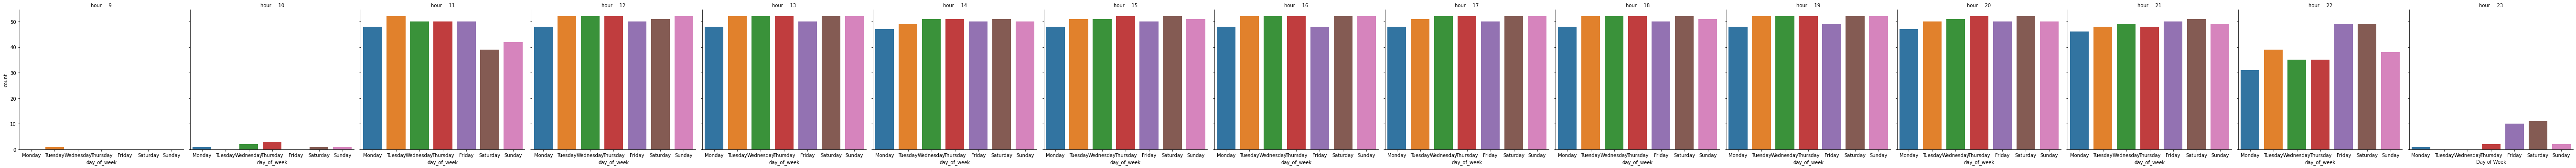

In [27]:
sns.catplot( kind='count', x='day_of_week', data=ordersbytime, col='hour', order=week_days)
plt.xlabel('Day of Week')
plt.ylabel('No. of Days')

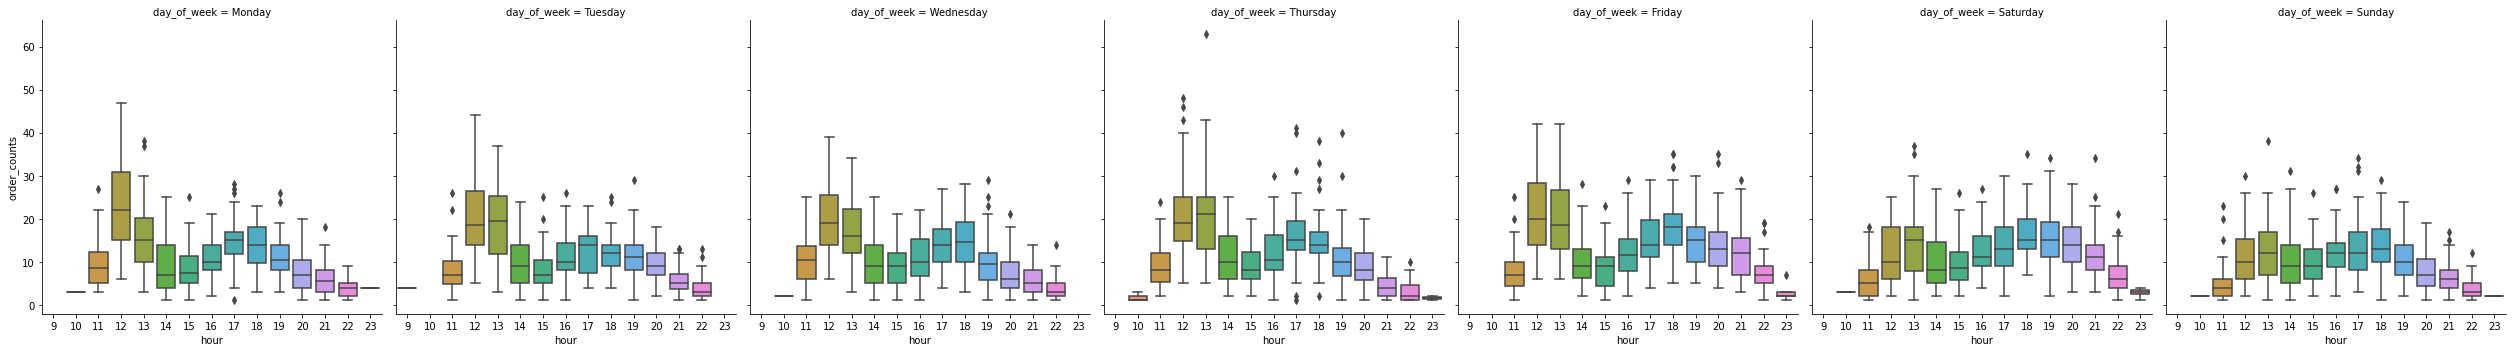

In [28]:
sns.catplot(kind='box', x='hour', y='order_counts', col='day_of_week', data=ordersbytime, col_order=week_days)
plt.savefig('boxplot.png');

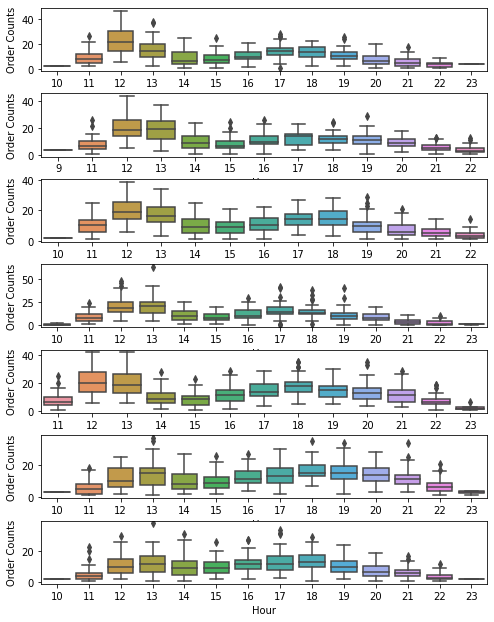

In [29]:
fig, axs = plt.subplots(7,1, figsize=(8,10))
for i in range(len(week_days)):
    ax = axs[i]
    sns.boxplot(x='hour', y='order_counts', data=ordersbytime[ordersbytime['day_of_week']==week_days[i]],ax=ax)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Order Counts')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

In [30]:
ordersbytime[ordersbytime.hour==10]

,date,hour,order_counts,day_of_month,month,day_of_week
642,2015-02-25,10,2,25,2,Wednesday
1023,2015-03-30,10,3,30,3,Monday
1083,2015-04-04,10,3,4,4,Saturday
1469,2015-05-07,10,1,7,5,Thursday
1945,2015-06-17,10,2,17,6,Wednesday
2124,2015-07-02,10,3,2,7,Thursday
2945,2015-09-10,10,1,10,9,Thursday
3201,2015-10-04,10,2,4,10,Sunday


In [31]:
orders['day']=orders['date'].dt.day_name()

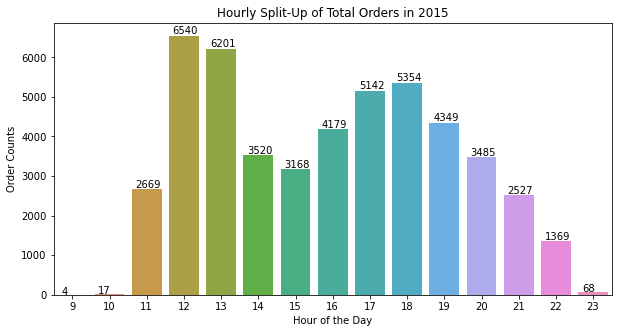

In [32]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='hour', data=orders)
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()*1.01))
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Order Counts')
ax.set_title('Hourly Split-Up of Total Orders in 2015');

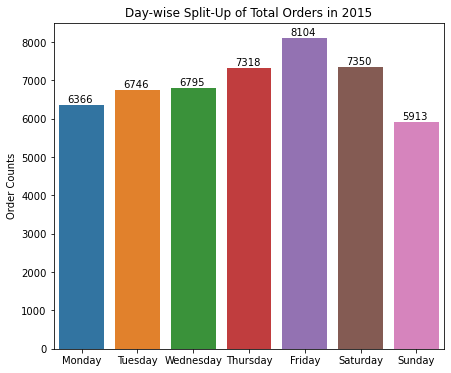

In [33]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='day', data=orders,  order=week_days)
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()*1.01))
ax.set_ylabel('Order Counts')
ax.set_xlabel(None)
ax.set_title('Day-wise Split-Up of Total Orders in 2015');

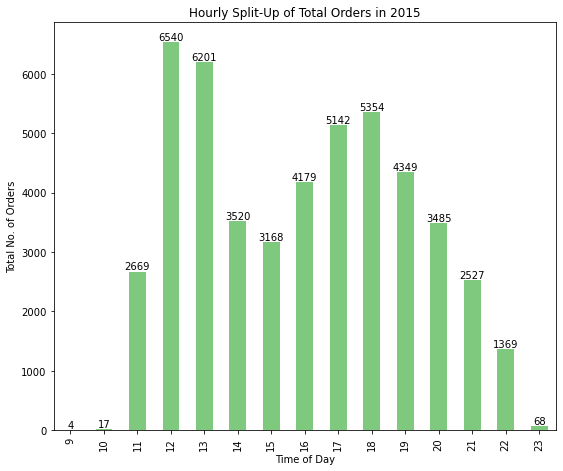

In [34]:
ax = ordersbytime[['hour','order_counts']].groupby(['hour']).sum().plot(kind='bar', legend=False, figsize=(9,7.5), colormap='Accent')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Time of Day')
ax.set_ylabel('Total No. of Orders')
ax.set_title('Hourly Split-Up of Total Orders in 2015');

In [35]:
ordersbytime[['hour','order_counts']].groupby(['hour']).sum()

,order_counts
hour,
9,4
10,17
11,2669
12,6540
13,6201
14,3520
15,3168
16,4179
17,5142


In [36]:
 ordersbytime[['day_of_week','order_counts']].groupby(['day_of_week']).sum().sort_values(by='order_counts')

,order_counts
day_of_week,
Sunday,5913
Monday,6366
Tuesday,6746
Wednesday,6795
Thursday,7318
Saturday,7350
Friday,8104


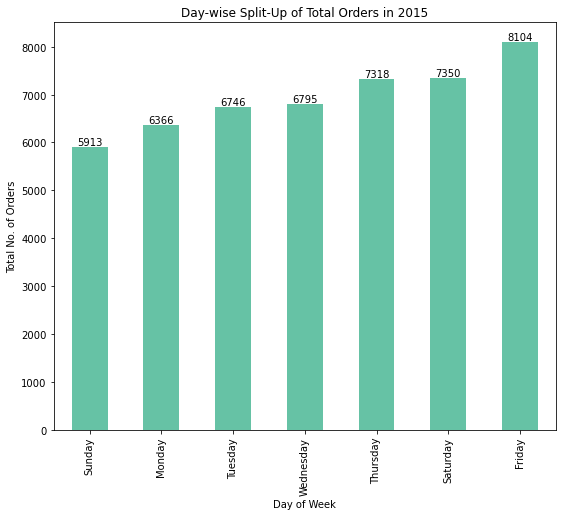

In [37]:
ax = ordersbytime[['day_of_week','order_counts']].groupby(['day_of_week']).sum().sort_values(by='order_counts').plot(kind='bar', legend=False, figsize=(9,7.5), colormap='Set2')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total No. of Orders')
ax.set_title('Day-wise Split-Up of Total Orders in 2015');

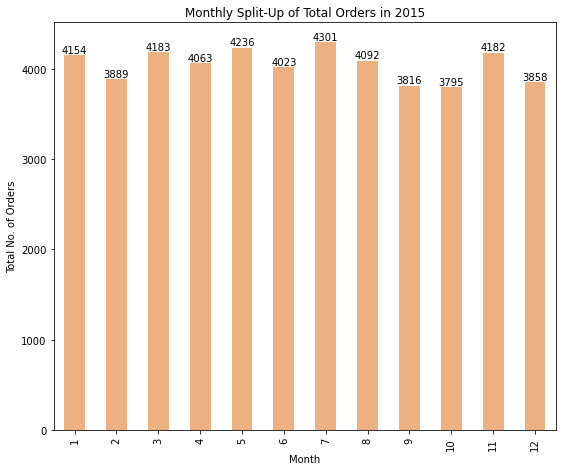

In [38]:
ax = ordersbytime[['month','order_counts']].groupby(['month']).sum().plot(kind='bar', legend=False, figsize=(9,7.5), colormap='flare')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Month')
ax.set_ylabel('Total No. of Orders')
ax.set_title('Monthly Split-Up of Total Orders in 2015');

https://stackoverflow.com/questions/20140788/pandas-colormap-with-groupby#:~:text=It%20sort%20of%20does%20work%2C%20but%20because%20you%27re,column%20gets%20a%20different%20color%20from%20the%20colormap.

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [39]:
# Assume that on an average people spend a maximum of 25-30 minutes in the pizza shop. This means that in an hour, 
# 30 orders can be easily accomodated [order id is specific to tables, and there are 15 tables with * 4 seats]

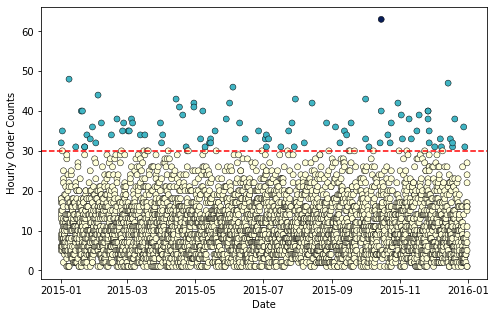

In [40]:
tempdf = ordersbytime
tempdf['color']= tempdf['order_counts'].apply(lambda x: 0 if x<=30 else 1 if x<=60 else 2)
plt.figure(figsize=(8,5))
sns.scatterplot(x='date',y='order_counts', data=tempdf, edgecolor='black',hue='color', palette='YlGnBu', legend=False)
plt.xlabel('Date')
plt.ylabel('Hourly Order Counts')
plt.axhline(y=30, linestyle='--', color='red');
tempdf=None

In [41]:
len(ordersbytime.date.unique())

358

In [42]:
ordersbytime[ordersbytime['order_counts']>30]

,date,hour,order_counts,day_of_month,month,day_of_week,color
2,2015-01-01,13,32,1,1,Thursday,1
19,2015-01-02,18,35,2,1,Friday,1
84,2015-01-08,12,48,8,1,Thursday,1
151,2015-01-14,12,31,14,1,Wednesday,1
209,2015-01-19,12,40,19,1,Monday,1
...,...,...,...,...,...,...,...
4032,2015-12-18,13,31,18,12,Friday,1
4037,2015-12-18,18,32,18,12,Friday,1
4057,2015-12-20,13,38,20,12,Sunday,1
4136,2015-12-28,12,36,28,12,Monday,1


In [43]:
len(ordersbytime[ordersbytime['order_counts']>30].date.unique())

84

In [44]:
84/358

0.2346368715083799

In [45]:
94/84

1.119047619047619

# Best and Worst Selling Pizza

In [46]:
pizza_stats = orders[['name', 'quantity']].groupby('name').sum('quantity').sort_values(ascending=False, by='quantity').reset_index()

In [47]:
pizza_stats

,name,quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371
5,The California Chicken Pizza,2370
6,The Sicilian Pizza,1938
7,The Spicy Italian Pizza,1924
8,The Southwest Chicken Pizza,1917
9,The Big Meat Pizza,1914


In [48]:
orders[['name', 'quantity']].groupby('name')['quantity'].sum().sort_values()

name
The Brie Carre Pizza                           490
The Mediterranean Pizza                        934
The Calabrese Pizza                            937
The Spinach Supreme Pizza                      950
The Soppressata Pizza                          961
The Spinach Pesto Pizza                        970
The Chicken Pesto Pizza                        973
The Italian Vegetables Pizza                   981
The Chicken Alfredo Pizza                      987
The Green Garden Pizza                         997
The Pepperoni, Mushroom, and Peppers Pizza    1359
The Greek Pizza                               1392
The Five Cheese Pizza                         1409
The Italian Capocollo Pizza                   1438
The Pepper Salami Pizza                       1446
The Spinach and Feta Pizza                    1446
The Prosciutto and Arugula Pizza              1457
The Napolitana Pizza                          1464
The Mexicana Pizza                            1484
The Vegetables + Vegetable

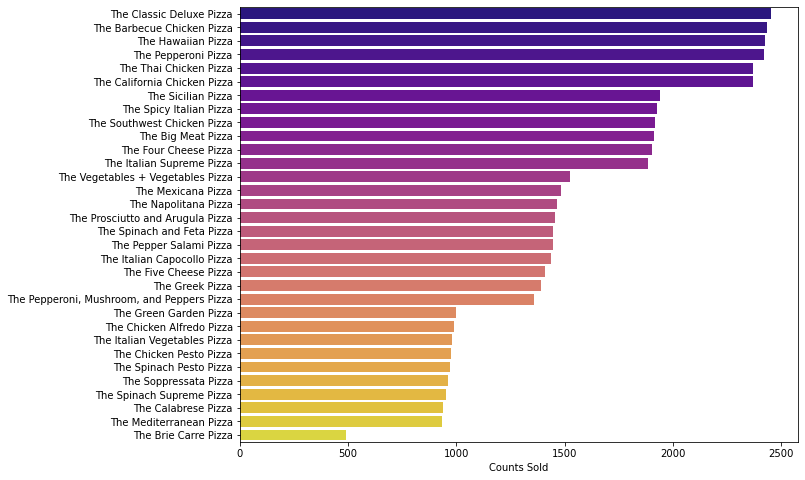

In [49]:
#pizza_stats.plot(kind='barh', x = 'name', y='quantity',figsize=(15,10), legend=False,color='#86bf91')
plt.figure(figsize=(10,8))
sns.color_palette("light:#5A9", as_cmap=True)
sns.barplot(y='name', x='quantity', data=pizza_stats, palette='plasma')
plt.ylabel(None)
plt.xlabel('Counts Sold');

In [50]:
orders['item_price'] = orders['quantity']*orders['unit_price']

In [51]:
pizzas_per_order = orders[['order_id', 'order_details_id']].groupby('order_id').size().reset_index(name='pizza_counts')

In [52]:
pizzas_per_order['bin'] = pizzas_per_order['pizza_counts'].apply(lambda x: str(x) if x<5 else '>=5')

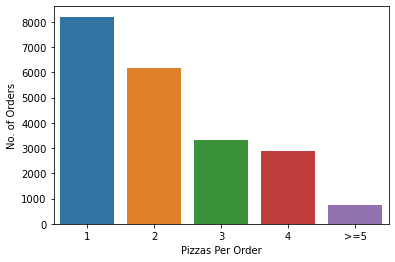

In [53]:
sns.countplot(data=pizzas_per_order, x='bin', order=['1','2','3','4', '>=5'])
plt.xlabel('Pizzas Per Order')
plt.ylabel('No. of Orders');

In [54]:
# Total contribution to revenue generated
orders[['name', 'item_price']].groupby('name')['item_price'].sum().sort_values()

name
The Brie Carre Pizza                          11588.50
The Green Garden Pizza                        13955.75
The Spinach Supreme Pizza                     15277.75
The Mediterranean Pizza                       15360.50
The Spinach Pesto Pizza                       15596.00
The Calabrese Pizza                           15934.25
The Italian Vegetables Pizza                  16019.25
The Soppressata Pizza                         16425.75
The Chicken Pesto Pizza                       16701.75
The Chicken Alfredo Pizza                     16900.25
The Pepperoni, Mushroom, and Peppers Pizza    18834.50
The Big Meat Pizza                            22968.00
The Spinach and Feta Pizza                    23271.25
The Napolitana Pizza                          24087.00
The Prosciutto and Arugula Pizza              24193.25
The Vegetables + Vegetables Pizza             24374.75
The Italian Capocollo Pizza                   25094.00
The Pepper Salami Pizza                       25529.00
The F

In [55]:
pizzas_per_order[pizzas_per_order['bin']=='>=5']

,order_id,pizza_counts,bin
1,2,5,>=5
8,9,9,>=5
16,17,10,>=5
77,78,6,>=5
91,92,9,>=5
...,...,...,...
21220,21228,14,>=5
21241,21249,11,>=5
21243,21251,11,>=5
21280,21288,11,>=5


In [56]:
pizzas_per_order['pizza_counts'].unique()

array([ 1,  5,  2,  9,  4,  3, 10,  6,  8, 12,  7, 14, 11, 13, 21, 15],
      dtype=int64)

In [57]:
#new_df = pizza_stats.merge(pizza_types[['name','ingredients']], on='name')

In [58]:
ingredients = pizza_types['ingredients'].apply(lambda x: x.replace(' ','')).values

In [59]:
all_ingredients=','.join(ingredients[:])

In [60]:
#all_ingredients = ','.join(pizza_types['ingredients'])
#result = new_df[["ingredients"]].multiply(new_df["quantity"], axis="index")
#s=''
#for i in range(len(result)):
 #   s = s.join(''+ result.iloc[i])

In [61]:
wordcloud = WordCloud(background_color='white', #stopwords=['Tomatoes','MozzarellaCheese'], 
                      width=800, height=600, colormap='viridis', max_words=120).generate(all_ingredients)

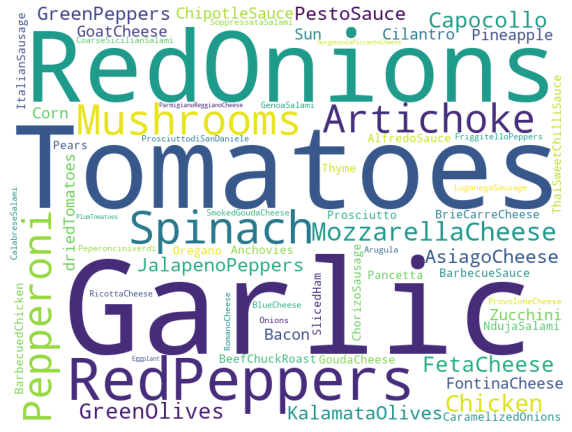

In [62]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.margins(x=0,y=0)

plt.show()

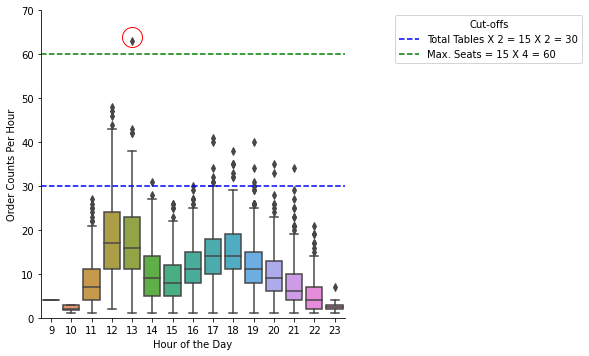

In [63]:
sns.catplot(kind='box', x='hour', y='order_counts', data=ordersbytime)
plt.ylim((0,70))
plt.axhline(y=30, linestyle='--', color='blue', label='Total Tables X 2 = 15 X 2 = 30')
plt.axhline(y=60, linestyle='--', color='green', label='Max. Seats = 15 X 4 = 60')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Counts Per Hour')
plt.plot(4,64, marker='o', markersize=20, markerfacecolor='none', markeredgecolor='red')
plt.legend(bbox_to_anchor=(1.15,1), title='Cut-offs');

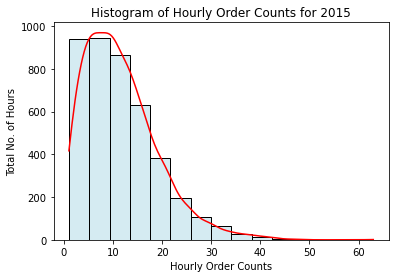

In [101]:
ax = sns.histplot(x='order_counts', data=ordersbytime, bins = 15, color='lightblue', kde=True)
ax.lines[0].set_color('red')
ax.set_xlabel('Hourly Order Counts')
ax.set_ylabel('Total No. of Hours')
ax.set_title('Histogram of Hourly Order Counts for 2015');